# **1. Introduction**


This project aims to evaluate the safety risks associated with purchasing and operating different types of aircraft for commercial and private enterprises. The company is expanding into the aviation industry and needs data-driven insights to guide the decision-making process on which aircraft to acquire, with a focus on minimizing potential risks.

The dataset used in this analysis contains aviation accident records from the National Transportation Safety Board (NTSB), spanning from 1962 to 2023. This rich dataset includes information on various aircraft types, accident severity, causes, locations, and other contributing factors. The primary goal is to assess the historical performance of different aircraft models by examining accident frequency, severity, and the underlying risk factors associated with each type of aircraft.


### **1.1 General objective**

To identify the safest aircraft that the company can purchase through analyzing aviation accident data and provide actionable insights for good decision making. 

#### **1.1.1 Specific objectives**

1.	To evaluate the aviation accident data with the goal of identifying the aircraft with the highest safety records and lowest risk. 

Visualization: Bar Chart / Horizontal Bar Chart to compare accident frequencies for different aircraft types.

2.	To analyze the data to understand factors contributing to accident frequency and severity. 

Heatmap to identify correlations between different risk factors.

3.	To use Geospatial Map to visualize accident distribution and risk hotspots the US and relationship between them and specific aircraft. 


The primary audience for this analysis is the Head of the Aviation Division, who needs actionable insights to make informed purchasing decisions about aircraft models for the company's new venture into aviation.




## 2. Data Understanding

In [2]:
#import python libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### loading data set

Using Pandas to load data set

In [3]:
df = pd.read_csv("C:/Users/Fluxtech/Desktop/Moringa projects/AviationData.csv", encoding='ISO-8859-1')
df.head()



c:\Users\Fluxtech\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.shape

(88889, 31)

In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.describe(include = 'O')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001214X45071,Accident,ERA22FA338,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [8]:
#make a copy

df2 = df.copy(deep = True)

In [9]:
#check for unique values all at once

for column in df2:
	unique_values = df2[column].unique()
	print(f"unique values in column {column}, '\n': {unique_values}", '\n')

unique values in column Event.Id, '
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

unique values in column Investigation.Type, '
': ['Accident' 'Incident'] 

unique values in column Accident.Number, '
': ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

unique values in column Event.Date, '
': ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29'] 

unique values in column Location, '
': ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, '] 

unique values in column Country, '
': ['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West I

# 3. Data wrangling 

### 3.1. Checking columns and changing mispelled to correct name

In [10]:
#check columns and deal with mispelled columns

df2.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [11]:
#for uniformity, change column name to lower case

df2.columns = df2.columns.str.lower()
df2.columns

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [12]:
#remove whitespaces if any

df2.columns = df2.columns.str.replace(" ", "")

In [13]:
#drop unncessary columns

df2.drop(['event.id', 'accident.number','airport.code', 'publication.date'], axis = 1, inplace = True)



In [14]:
df2.columns

Index(['investigation.type', 'event.date', 'location', 'country', 'latitude',
       'longitude', 'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status'],
      dtype='object')

In [15]:
# Replace fullstop with lowerscore for the who data
df2.columns = df2.columns.str.replace(".", "_")


### 3.2. Checking missing values

In [16]:
#check the missing values and deal with them

df2.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_name              36099
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1317
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6381
dtype: int64

In [17]:
#for make, mode and injury severity, we use mode to fill missings

make_mode = df2["make"].mode()[0]
df2['make'] = df2['make'].fillna(make_mode)


In [18]:
#for make, mode and injury severity, we use mode to fill missings

model_mode = df2["model"].mode()[0]
df2['model'] = df2['model'].fillna(model_mode)

In [19]:
#for make, mode and injury severity, we use mode to fill missings
injury_severity_mode = df2["injury_severity"].mode()[0]
df2['injury_severity'] = df2['injury_severity'].fillna(injury_severity_mode)

In [20]:
#check the missing values and deal with them

df2.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_name              36099
injury_severity               0
aircraft_damage            3194
aircraft_category         56602
registration_number        1317
make                          0
model                         0
amateur_built               102
number_of_engines          6084
engine_type                7077
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6381
dtype: int64

In [21]:
columns_to_drop = ['latitude', 'longitude', 'schedule', 'far_description', 'air_carrier', 'aircraft_category']
columns_to_drop

df2 = df2.drop(columns=columns_to_drop)

In [22]:
df2.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
airport_name              36099
injury_severity               0
aircraft_damage            3194
registration_number        1317
make                          0
model                         0
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6381
dtype: int64

In [23]:
# Impute `location` and `registration_number` with the most frequent values
df2['location'] = df2['location'].fillna(df2['location'].mode()[0])
df2['registration_number'] = df2['registration_number'].fillna(df2['registration_number'].mode()[0])

In [24]:
# Impute `broad_phase_of_flight` using the most frequent value
df2['broad_phase_of_flight'] = df2['broad_phase_of_flight'].fillna(df2['broad_phase_of_flight'].mode()[0])



In [25]:
#country`: Impute with mode or "Unknown" if highly diverse
df2['country'] = df2['country'].fillna(df2['country'].mode()[0])

#aircraft_damage`: Impute with mode
df2['aircraft_damage'] = df2['aircraft_damage'].fillna(df2['aircraft_damage'].mode()[0])

#amateur_built`: Impute with "No" assuming majority aircraft are not amateur-built
df2['amateur_built'] = df2['amateur_built'].fillna("No")

#number of engines replace with median
df2['number_of_engines'] = df2['number_of_engines'].fillna(df2['number_of_engines'].median())


In [26]:
#weather_condition`: Impute with mode
df2['weather_condition'] = df2['weather_condition'].fillna(df2['weather_condition'].mode()[0])


In [27]:
columns_to_drop_now = ['airport_name']
columns_to_drop_now

df2 = df2.drop(columns=columns_to_drop_now)

In [28]:
#report_status`: Fill with "Unknown" if missing
df2['report_status'] = df2['report_status'].fillna("Unknown")

In [29]:
#For rows where grouping doesn't provide a mode, fill remaining with "Unknown"
df2['engine_type'] = df2['engine_type'].fillna("Unknown")

#purpose_of_flight`: Impute with mode or "Unknown"
df2['purpose_of_flight'] = df2['purpose_of_flight'].fillna("Unknown")

In [30]:
#Injury-related columns: Replace missing with 0
injury_columns = [
    'total_fatal_injuries', 'total_serious_injuries',
    'total_minor_injuries', 'total_uninjured'
]
df2[injury_columns] = df2[injury_columns].fillna(0)

In [31]:
df2.columns


Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'registration_number', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status'],
      dtype='object')

In [32]:
#check for unique values all at once

for column in df2:
	unique_values = df2[column].unique()
	print(f"unique values in column {column}, '\n': {unique_values}", '\n')

unique values in column investigation_type, '
': ['Accident' 'Incident'] 

unique values in column event_date, '
': ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29'] 

unique values in column location, '
': ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, '] 

unique values in column country, '
': ['United States' 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 'Panama' 'Guyana' 'Norway'
 'Hong Kong' 'Portugal' 'Malaysia' 'Turks And Caicos Islands'
 'Northe

In [33]:
# Drop the 'report_status' column
df2 = df2.drop(columns=["report_status"])

In [34]:
df2.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'registration_number', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight'],
      dtype='object')

In [35]:
#check unique value for each column and count them

df2.groupby('investigation_type')['investigation_type'].count()

investigation_type
Accident    85015
Incident     3874
Name: investigation_type, dtype: int64

In [36]:
#check unique value for each column and count them

df2.groupby('injury_severity')['injury_severity'].count()

injury_severity
Fatal           5262
Fatal(1)        6167
Fatal(10)         32
Fatal(102)         2
Fatal(104)         2
               ...  
Incident        2219
Minor            218
Non-Fatal      68357
Serious          173
Unavailable       96
Name: injury_severity, Length: 109, dtype: int64

In [37]:
# Replace rows like "Fatal(2)", "Fatal(3)", etc., with "Fatal"
df2['injury_severity'] = df2['injury_severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)

# Verify the changes
print(df2['injury_severity'].unique())

['Fatal' 'Non-Fatal' 'Incident' 'Unavailable' 'Minor' 'Serious']


In [38]:
#check unique value for each column and count them

df2.groupby('engine_type')['engine_type'].count()


engine_type
Electric              10
Geared Turbofan       12
Hybrid Rocket          1
LR                     2
NONE                   2
None                  19
Reciprocating      69530
Turbo Fan           2481
Turbo Jet            703
Turbo Prop          3391
Turbo Shaft         3609
UNK                    1
Unknown             9128
Name: engine_type, dtype: int64

In [39]:
#Replacing unique values in engine_type

df2["engine_type"] = df2["engine_type"].str.replace("NONE", "None")

df2["engine_type"] = df2["engine_type"].str.replace("UNK", "Unknown")

In [40]:
#check unique value for each column and count them

df2.groupby('engine_type')['engine_type'].count()


engine_type
Electric              10
Geared Turbofan       12
Hybrid Rocket          1
LR                     2
None                  21
Reciprocating      69530
Turbo Fan           2481
Turbo Jet            703
Turbo Prop          3391
Turbo Shaft         3609
Unknown             9129
Name: engine_type, dtype: int64

In [41]:
#check unique value for each column and count them

df2.groupby('weather_condition')['weather_condition'].count()

weather_condition
IMC     5976
UNK      856
Unk      262
VMC    81795
Name: weather_condition, dtype: int64

In [42]:
df2["weather_condition"] = df2["weather_condition"].str.replace("UNK", "Unk")

### 3.3 Checking Duplicates

In [43]:
#check for duplicates and drop them 

df2.duplicated().sum()
df2 = df2.drop_duplicates()


### 3.4. Checking Outliers 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'number_of_engines'),
  Text(1, 0, 'total_fatal_injuries'),
  Text(2, 0, 'total_serious_injuries'),
  Text(3, 0, 'total_minor_injuries'),
  Text(4, 0, 'total_uninjured')])

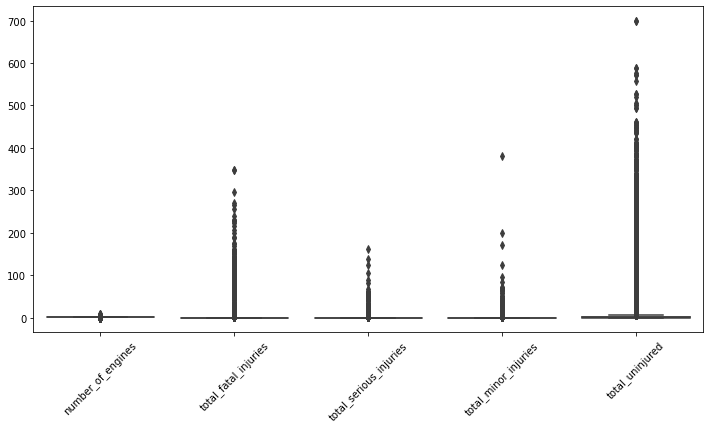

In [44]:
#to show all outliers 

numeric_cols = df2.select_dtypes(include='number')

# Create a boxplot for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)

# Show the plot
plt.xticks(rotation=45)

c:\Users\Fluxtech\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


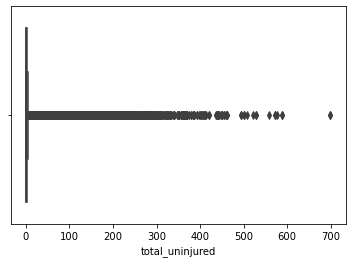

In [45]:
#identifying outliers in total_uninjured

sns.boxplot(df2["total_uninjured"]);

In [46]:
#removing outliers
max_total_unijured = df2["total_uninjured"].quantile(0.995)
max_total_unijured

#Check outliers at max
df2[df2["total_uninjured"] > max_total_unijured]


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
2456,Incident,1982-08-21,"HONOLULU, HI",United States,Incident,Minor,N104WA,Mcdonnell Douglas,DC-10-30F,No,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,393.0,VMC,Takeoff
3578,Incident,1982-12-30,"THERMAL, CA",United States,Incident,Substantial,N137AA,Mcdonnell-douglas,DC-10-30,No,3.0,Turbo Fan,Unknown,0.0,0.0,14.0,203.0,VMC,Climb
3686,Incident,1983-01-13,"CHICAGO, IL",United States,Incident,Minor,N115AA,Mcdonnell Douglas,DC10-10,No,3.0,Turbo Jet,Unknown,0.0,0.0,0.0,201.0,VMC,Landing
3702,Incident,1983-01-16,"LOS ANGELES, CA",United States,Incident,Minor,N9664,Boeing,747-123,No,4.0,Turbo Fan,Personal,0.0,0.0,0.0,412.0,VMC,Taxi
4149,Incident,1983-03-18,"LOS ANGELES, CA",United States,Incident,Minor,N323EA,Lockheed,L-1011,No,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,588.0,VMC,Standing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88319,Accident,2022-08-06,"Atlanta, GA",United States,Non-Fatal,Substantial,N540US,BOEING,757-251,No,1.0,Unknown,Unknown,0.0,0.0,0.0,203.0,VMC,Landing
88563,Incident,2022-09-22,"Los Angeles, CA",United States,Non-Fatal,Substantial,N393HA,AIRBUS,A330-243,No,2.0,Unknown,Unknown,0.0,0.0,0.0,290.0,Unk,Landing
88605,Incident,2022-10-01,"Manila,",Philippines,Non-Fatal,Minor,HZ-AK28,BOEING,777,No,1.0,Unknown,Unknown,0.0,0.0,0.0,368.0,VMC,Landing
88726,Incident,2022-10-27,"Buenos Aires,",Argentina,Non-Fatal,Substantial,N765AN,BOEING,777-223,No,1.0,Unknown,Unknown,0.0,0.0,0.0,268.0,VMC,Landing


In [47]:
df3 = df2[df2["total_uninjured"] < max_total_unijured]

c:\Users\Fluxtech\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


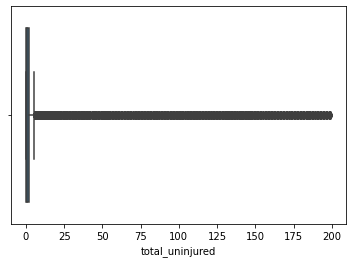

In [48]:
sns.boxplot(df3["total_uninjured"]);

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'number_of_engines'),
  Text(1, 0, 'total_fatal_injuries'),
  Text(2, 0, 'total_serious_injuries'),
  Text(3, 0, 'total_minor_injuries'),
  Text(4, 0, 'total_uninjured')])

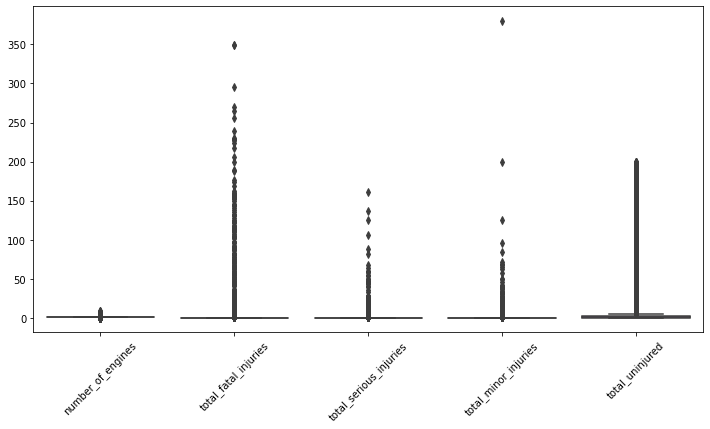

In [49]:
#to show all outliers 

numeric_cols = df3.select_dtypes(include='number')

# Create a boxplot for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)

# Show the plot
plt.xticks(rotation=45)

In [50]:
#removing outliers
max_total_minor_injuries = df3["total_minor_injuries"].quantile(0.995)
max_total_minor_injuries

#Check outliers at max
df3[df3["total_minor_injuries"] > max_total_minor_injuries]


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
155,Accident,1982-01-23,"BOSTON, MA",United States,Fatal,Destroyed,N113WA,Mcdonnell Douglas,DC-10-30,No,3.0,Turbo Fan,Unknown,2.0,4.0,24.0,182.0,IMC,Landing
229,Accident,1982-02-03,"HAYDEN, CO",United States,Non-Fatal,Destroyed,N149JA,Mitsubishi,MU2B-40,No,2.0,Turbo Prop,Business,0.0,0.0,6.0,0.0,IMC,Landing
552,Accident,1982-03-12,"SYRACUSE, NY",United States,Non-Fatal,Substantial,N260BB,Piper,PA-32,No,1.0,Reciprocating,Unknown,0.0,0.0,5.0,0.0,IMC,Approach
1343,Accident,1982-05-26,"SAN FRANCISCO, CA",United States,Non-Fatal,Substantial,N1833U,Douglas,DC10-10,No,3.0,Turbo Fan,Unknown,0.0,0.0,25.0,113.0,VMC,Taxi
1347,Incident,1982-05-27,"NEAR GOSHEN, IN",United States,Incident,Substantial,N8088U,Douglas,DC-8-61,No,4.0,Turbo Jet,Unknown,0.0,0.0,17.0,129.0,VMC,Cruise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86385,Accident,2021-06-14,"Madisonville, TX",United States,Fatal,Substantial,N3258W,PIPER,PA-32-260,No,1.0,Unknown,Personal,1.0,0.0,5.0,0.0,VMC,Landing
86814,Accident,2021-08-28,"Kuserua, Spain",Spain,Non-Fatal,Unknown,HC-CMQ,BRITTEN NORMAN,BN2A,No,2.0,Unknown,Unknown,0.0,0.0,7.0,0.0,Unk,Landing
86864,Accident,2021-09-09,"Provincetown, MA",United States,Non-Fatal,Substantial,N88833,CESSNA,402C,No,2.0,Unknown,Unknown,0.0,0.0,7.0,0.0,IMC,Landing
87788,Accident,2022-05-11,"BOITUVA, OF",Brazil,Fatal,Substantial,PT-OQR,CESSNA,208,No,1.0,Unknown,Unknown,2.0,0.0,7.0,7.0,VMC,Landing


c:\Users\Fluxtech\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_minor_injuries'>

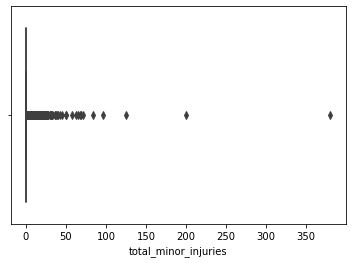

In [51]:
df4 = df3[df3["total_minor_injuries"] < max_total_minor_injuries]

sns.boxplot(df3["total_minor_injuries"])

In [52]:
#removing outliers
max_total_serious_injuries = df4["total_serious_injuries"].quantile(0.995)
max_total_serious_injuries

#Check outliers at max
df4[df4["total_serious_injuries"] > max_total_serious_injuries]


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
84,Accident,1982-01-13,"WASHINGTON, DC",United States,Fatal,Destroyed,N62AF,Boeing,737-222,No,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff
214,Accident,1982-02-01,"GROTON, CT",United States,Non-Fatal,Destroyed,N451C,Beech,99,No,2.0,Turbo Prop,Unknown,0.0,5.0,2.0,0.0,IMC,Approach
377,Accident,1982-02-21,"PROVIDENCE, RI",United States,Fatal,Destroyed,N127PM,De Havilland,DHC-6,No,2.0,Turbo Prop,Unknown,1.0,10.0,1.0,0.0,VMC,Cruise
1216,Accident,1982-05-16,"HOOPER BAY, AK",United States,Non-Fatal,Destroyed,N103AQ,De Havilland,DHC-6-200,No,2.0,Turbo Prop,Unknown,0.0,8.0,0.0,0.0,VMC,Approach
1465,Accident,1982-06-06,"ST. PETERSBURG, FL",United States,Non-Fatal,Destroyed,N95C,Douglas,DC-3C,No,2.0,Reciprocating,Unknown,0.0,5.0,0.0,0.0,VMC,Takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85149,Accident,2020-08-03,"Jackson, WY",United States,Non-Fatal,Substantial,N971LB,Lindstrand,310A,No,8.0,LR,Business,0.0,13.0,2.0,1.0,VMC,Landing
86455,Accident,2021-06-25,"New Orleans, LA",United States,Non-Fatal,Substantial,N926UW,AIRBUS,A321-231,No,2.0,Unknown,Unknown,0.0,8.0,1.0,185.0,VMC,Landing
87537,Accident,2022-03-16,"Baía de Camamu, BA, OF",Brazil,Fatal,Substantial,PR-LCT,SIKORSKY,S76,No,1.0,Unknown,Unknown,1.0,12.0,0.0,0.0,VMC,Landing
87861,Accident,2022-05-27,"Lahore,",Pakistan,Serious,Substantial,A6-BLF,BOEING,787-900,No,1.0,Unknown,Unknown,0.0,6.0,1.0,121.0,VMC,Landing


c:\Users\Fluxtech\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_serious_injuries'>

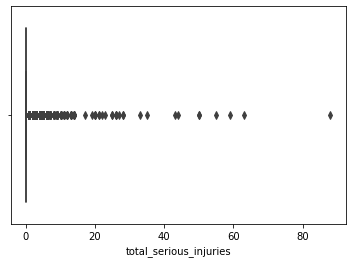

In [53]:
df5 = df4[df4["total_serious_injuries"] < max_total_serious_injuries]

sns.boxplot(df4["total_serious_injuries"])

In [54]:
#removing outliers
max_total_fatal_injuries = df5["total_fatal_injuries"].quantile(0.995)
max_total_fatal_injuries

#Check outliers at max
df4[df4["total_fatal_injuries"] > max_total_fatal_injuries]


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
25,Accident,1982-01-03,"ASHLAND, VA",United States,Fatal,Destroyed,N2620L,Cessna,414A,No,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Approach
84,Accident,1982-01-13,"WASHINGTON, DC",United States,Fatal,Destroyed,N62AF,Boeing,737-222,No,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff
165,Accident,1982-01-24,"LAREDO, TX",United States,Fatal,Destroyed,N4244Z,Robertson,C-402B,No,2.0,Reciprocating,Personal,7.0,0.0,0.0,0.0,VMC,Approach
254,Accident,1982-02-07,"W. OF HOMESTEAD, FL",United States,Fatal,Destroyed,N7361P,Piper,PA-24-180,No,1.0,Reciprocating,Personal,8.0,0.0,0.0,0.0,VMC,Cruise
255,Accident,1982-02-07,"W. OF HOMESTEAD, FL",United States,Fatal,Destroyed,N2280G,Cessna,182B,No,1.0,Reciprocating,Personal,8.0,0.0,0.0,0.0,VMC,Cruise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87471,Accident,2022-02-26,"Comoros,",China,Fatal,Unknown,5H-MZA,CESSNA,208B,No,1.0,Unknown,Unknown,14.0,0.0,0.0,0.0,VMC,Landing
87562,Accident,2022-03-21,"Wuzhou,",China,Fatal,Destroyed,B-1791,BOEING,737,No,1.0,Unknown,Unknown,132.0,0.0,0.0,0.0,VMC,Landing
88468,Accident,2022-09-04,"Freeland, WA",United States,Fatal,Substantial,N725TH,DEHAVILLAND,DHC-3,No,1.0,Unknown,Unknown,10.0,0.0,0.0,0.0,VMC,Landing
88689,Accident,2022-10-18,"Rudraprayag,",India,Fatal,Destroyed,VT-RPN,BELL,407,No,1.0,Unknown,Unknown,7.0,0.0,0.0,0.0,VMC,Landing


c:\Users\Fluxtech\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_fatal_injuries'>

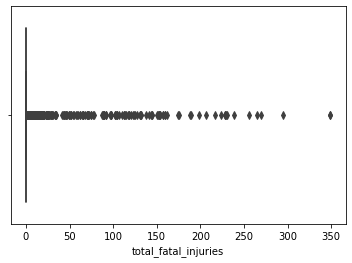

In [55]:
df6 = df5[df5["total_fatal_injuries"] < max_total_fatal_injuries]

sns.boxplot(df4["total_fatal_injuries"])

In [56]:
df6.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'registration_number', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight'],
      dtype='object')

In [57]:
#confirming data types

df6.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86590 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      86590 non-null  object 
 1   event_date              86590 non-null  object 
 2   location                86590 non-null  object 
 3   country                 86590 non-null  object 
 4   injury_severity         86590 non-null  object 
 5   aircraft_damage         86590 non-null  object 
 6   registration_number     86590 non-null  object 
 7   make                    86590 non-null  object 
 8   model                   86590 non-null  object 
 9   amateur_built           86590 non-null  object 
 10  number_of_engines       86590 non-null  float64
 11  engine_type             86590 non-null  object 
 12  purpose_of_flight       86590 non-null  object 
 13  total_fatal_injuries    86590 non-null  float64
 14  total_serious_injuries  86590 non-null

In [58]:
# Filter the rows where the country is 'United States'
df6 = df6[df6['country'] == 'United States']

In [59]:
# Use str.split and limit to 2 splits (expand=True ensures two separate columns)
df6[['City', 'State']] = df6['location'].str.split(', ', expand=True, n=1)

# Fill missing 'State' values with 'Unknown' to handle inconsistencies
df6['State'] = df6['State'].fillna('Unknown')

In [60]:
df6.to_csv("AviationData_cleansetfinal.csv", index = False)

In [61]:
df6 = pd.read_csv("AviationData_cleansetfinal.csv")
df6.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,...,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,City,State
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,NC6404,Stinson,108-3,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unk,Cruise,MOOSE CREEK,ID
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,N5069P,Piper,PA24-180,No,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unk,Unknown,BRIDGEPORT,CA
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,N5142R,Cessna,172M,No,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Saltville,VA
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,N1168J,Rockwell,112,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,EUREKA,CA
4,Accident,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,N15NY,Cessna,501,No,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Canton,OH


The research aims at first indentifying the safest Aircraft based on the frequency of the accidents. 

It was noted that CESSNA 72 and Cessna 72 is the same plane. That means the data may require further cleaning

In [62]:
df6["make"] = df6["make"].str.replace("CESSNA", "Cessna")

In [63]:
# Extract state abbreviation (last two characters after a comma)
df6['State_Abbreviation'] = df6['location'].str.extract(r',\s*([A-Z]{2})$')

# Fill missing values with 'Unknown'
df6['State_Abbreviation'] = df6['State_Abbreviation'].fillna('Unknown')

# Check the results
print(df6[['location', 'State_Abbreviation']].head())

          location State_Abbreviation
0  MOOSE CREEK, ID                 ID
1   BRIDGEPORT, CA                 CA
2    Saltville, VA                 VA
3       EUREKA, CA                 CA
4       Canton, OH                 OH


In [64]:
# Find rows without valid state abbreviations
missing_states = df6[df6['State_Abbreviation'] == 'Unknown']
print(missing_states)

      investigation_type  event_date           location        country  \
35              Accident  1982-01-04        SAINT CROIX  United States   
443             Accident  1982-03-02           HUMA CAO  United States   
444             Accident  1982-03-02    MUSTANG BLK A11  United States   
697             Accident  1982-03-31               MOCA  United States   
802             Accident  1982-04-13    WEST DELTA 105D  United States   
...                  ...         ...                ...            ...   
76833           Accident  2019-07-10            Saipan,  United States   
77140           Accident  2019-09-12  Charlotte Amalie,  United States   
77150           Accident  2019-09-15    Gulf of Mexico,  United States   
77268           Accident  2019-10-17           Unknown,  United States   
77829           Accident  2020-06-01    GULF OF MEXICO,  United States   

      injury_severity aircraft_damage registration_number    make    model  \
35              Fatal       Destr

In [65]:
# Dictionary to map state abbreviations to full names
state_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire",
    "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York", "NC": "North Carolina",
    "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania",
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee",
    "TX": "Texas", "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington",
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}


In [66]:
# Extract state abbreviation (last two characters after a comma)
df6['State_Abbreviation'] = df6['location'].str.extract(r',\s*([A-Z]{2})$')

# Map the abbreviations to full state names
df6['State'] = df6['State_Abbreviation'].map(state_mapping)

# Fill missing state names with 'Unknown'
df6['State'] = df6['State'].fillna('Unknown')

# Check the results
print(df6[['location', 'State_Abbreviation', 'State']].head())

          location State_Abbreviation       State
0  MOOSE CREEK, ID                 ID       Idaho
1   BRIDGEPORT, CA                 CA  California
2    Saltville, VA                 VA    Virginia
3       EUREKA, CA                 CA  California
4       Canton, OH                 OH        Ohio


In [67]:
df6.drop(columns=['State_Abbreviation'], inplace=True)


In [68]:
# Remove the state abbreviation and keep only the city name
df6['City'] = df6['location'].str.replace(r',\s*[A-Z]{2}$', '', regex=True)

# Check the results
print(df6[['location', 'City']].head())

          location         City
0  MOOSE CREEK, ID  MOOSE CREEK
1   BRIDGEPORT, CA   BRIDGEPORT
2    Saltville, VA    Saltville
3       EUREKA, CA       EUREKA
4       Canton, OH       Canton


In [69]:
df6.drop(columns=['location'], inplace=True)

In [70]:
# Rename the 'City' column to 'location'
df6.rename(columns={'City': 'location'}, inplace=True)

# Check the updated DataFrame
print(df6.head())


  investigation_type  event_date        country injury_severity  \
0           Accident  1948-10-24  United States           Fatal   
1           Accident  1962-07-19  United States           Fatal   
2           Accident  1974-08-30  United States           Fatal   
3           Accident  1977-06-19  United States           Fatal   
4           Accident  1979-08-02  United States           Fatal   

  aircraft_damage registration_number      make     model amateur_built  \
0       Destroyed              NC6404   Stinson     108-3            No   
1       Destroyed              N5069P     Piper  PA24-180            No   
2       Destroyed              N5142R    Cessna      172M            No   
3       Destroyed              N1168J  Rockwell       112            No   
4       Destroyed               N15NY    Cessna       501            No   

   number_of_engines    engine_type purpose_of_flight  total_fatal_injuries  \
0                1.0  Reciprocating          Personal              

In [71]:
df6.columns

Index(['investigation_type', 'event_date', 'country', 'injury_severity',
       'aircraft_damage', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'location', 'State'],
      dtype='object')

In [72]:
df6.head()

,investigation_type,event_date,country,injury_severity,aircraft_damage,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,location,State
0,Accident,1948-10-24,United States,Fatal,Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unk,Cruise,MOOSE CREEK,Idaho
1,Accident,1962-07-19,United States,Fatal,Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unk,Unknown,BRIDGEPORT,California
2,Accident,1974-08-30,United States,Fatal,Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Saltville,Virginia
3,Accident,1977-06-19,United States,Fatal,Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,EUREKA,California
4,Accident,1979-08-02,United States,Fatal,Destroyed,N15NY,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Canton,Ohio


In [73]:
#Save Final document 

df6.to_csv('AviationData_updatedupdatedupdated.csv', index=False)

# 4.0 Data Analysis and Results

### 4.1. Objective 1

The goal of this object is to evaluate the aviation accident data with the goal of identifying the aircraft with the highest safety records and lowest risk.

The top 10 most common used aircraft were selected for the pupose of this report. Thereafter severity score was calculated as shown in the code. The severity score was calculated to quantify the seriousness of aviation accidents based on various injury categories and the extent of aircraft damage. This score helped in identifying which aircraft types are involved in more severe accidents highlighting the reasons as to why not to invest in those planes. 


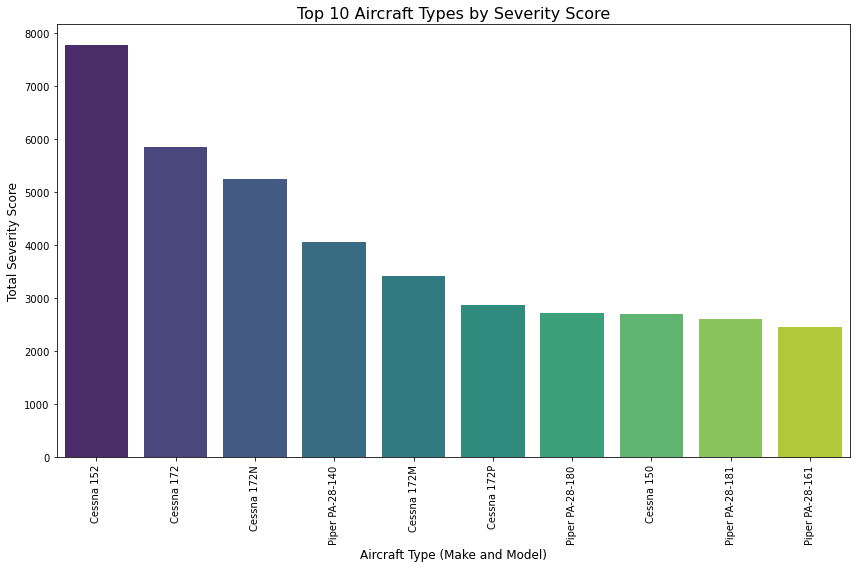

In [74]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df6 is already loaded and contains the necessary columns

# Calculate severity score
df6['severity_score'] = (
    (df6['total_fatal_injuries'] * 5) +
    (df6['total_serious_injuries'] * 3) +
    (df6['total_minor_injuries'] * 1) +
    df6['aircraft_damage'].map({
        'Destroyed': 3,
        'Substantial': 2,
        'Minor': 0
    })
)

# Combine 'make' and 'model' to create 'type_of_aircraft'
df6['type_of_aircraft'] = df6['make'] + " " + df6['model']

# Group by 'type_of_aircraft' and sum severity scores
make_model_severity = df6.groupby('type_of_aircraft').agg(
    total_severity_score=('severity_score', 'sum'),
    accident_count=('type_of_aircraft', 'size')
).reset_index()

# Sort by severity score in descending order
make_model_severity = make_model_severity.sort_values(by='total_severity_score', ascending=False)

# Select the top 10 aircraft by severity score
top_10_severity = make_model_severity.head(10)

# Plot a vertical bar chart for the top 10 aircraft types by severity score
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_10_severity['type_of_aircraft'], 
    y=top_10_severity['total_severity_score'], 
    palette='viridis'
)

# Add titles and labels
plt.title('Top 10 Aircraft Types by Severity Score', fontsize=16)
plt.xlabel('Aircraft Type (Make and Model)', fontsize=12)
plt.ylabel('Total Severity Score', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


### 4.2. Objective 2


The purpose of this objective is to analyze the data to understand factors contributing to accident frequency and severity of the selected 10 most common used aircrafts.

The severity is first calculated in order to find factor that contributes to most accidents. 

In [75]:
import pandas as pd

# Assuming df6 is already loaded

# Calculate severity score based on injuries
df6['Severity Score'] = (
    (df6['total_fatal_injuries'] * 5) +
    (df6['total_serious_injuries'] * 3) +
    (df6['total_minor_injuries'] * 1) +
    df6['aircraft_damage'].map({
        'Destroyed': 3,
        'Substantial': 2,
        'Minor': 0
    })
)

# Display first few rows to check the calculation
print(df6[['make', 'model', 'weather_condition', 'broad_phase_of_flight', 'engine_type', 'Severity Score']].head())



       make     model weather_condition broad_phase_of_flight    engine_type  \
0   Stinson     108-3               Unk                Cruise  Reciprocating   
1     Piper  PA24-180               Unk               Unknown  Reciprocating   
2    Cessna      172M               IMC                Cruise  Reciprocating   
3  Rockwell       112               IMC                Cruise  Reciprocating   
4    Cessna       501               VMC              Approach        Unknown   

   Severity Score  
0            13.0  
1            23.0  
2            18.0  
3            13.0  
4            14.0  


In [76]:

# Count accidents by aircraft model
accident_counts = df6.groupby(['make', 'model']).size().reset_index(name='Accident Count')

# Sort by accident count in descending order
top_10_models = accident_counts.sort_values(by='Accident Count', ascending=False).head(10)

# Display top 10 models
print(top_10_models)


         make      model  Accident Count
4680   Cessna        152            2332
4704   Cessna        172            1631
4753   Cessna       172N            1123
4653   Cessna        150             791
13538   Piper  PA-28-140             791
4751   Cessna       172M             762
4756   Cessna       172P             665
4786   Cessna        180             614
4809   Cessna        182             580
4679   Cessna       150M             578


In [77]:
# Filter df6 to only include the top 10 models
top_10_df = df6[df6['make'].isin(top_10_models['make']) & df6['model'].isin(top_10_models['model'])]

# Group by aircraft model and contributing factors to calculate the average severity score
factors_analysis = top_10_df.groupby(['make', 'model', 'weather_condition', 'broad_phase_of_flight', 'engine_type']).agg(
    accident_count=('make', 'size'),
    avg_severity_score=('Severity Score', 'mean')
).reset_index()

# Display the results
print(factors_analysis.head())


     make model weather_condition broad_phase_of_flight    engine_type  \
0  Cessna   150               IMC              Approach  Reciprocating   
1  Cessna   150               IMC                Cruise  Reciprocating   
2  Cessna   150               IMC               Descent  Reciprocating   
3  Cessna   150               IMC               Landing  Reciprocating   
4  Cessna   150               IMC               Takeoff  Reciprocating   

   accident_count  avg_severity_score  
0               4                 8.0  
1              10                 6.0  
2               1                 4.0  
3               5                 6.4  
4               3                 5.0  


In [78]:

# Encode categorical variables for correlation analysis
top_10_df_encoded = top_10_df.copy()

# Convert categorical variables to category codes
top_10_df_encoded['weather_condition'] = pd.Categorical(top_10_df_encoded['weather_condition']).codes
top_10_df_encoded['broad_phase_of_flight'] = pd.Categorical(top_10_df_encoded['broad_phase_of_flight']).codes
top_10_df_encoded['engine_type'] = pd.Categorical(top_10_df_encoded['engine_type']).codes

# Calculate the correlation matrix for the factors and severity score
correlation_matrix = top_10_df_encoded[['weather_condition', 'broad_phase_of_flight', 'engine_type', 'Severity Score']].corr()

# Display correlation matrix
print(correlation_matrix)


                       weather_condition  broad_phase_of_flight  engine_type  \
weather_condition               1.000000               0.115083     0.012540   
broad_phase_of_flight           0.115083               1.000000     0.000839   
engine_type                     0.012540               0.000839     1.000000   
Severity Score                 -0.271399              -0.050023     0.028046   

                       Severity Score  
weather_condition           -0.271399  
broad_phase_of_flight       -0.050023  
engine_type                  0.028046  
Severity Score               1.000000  


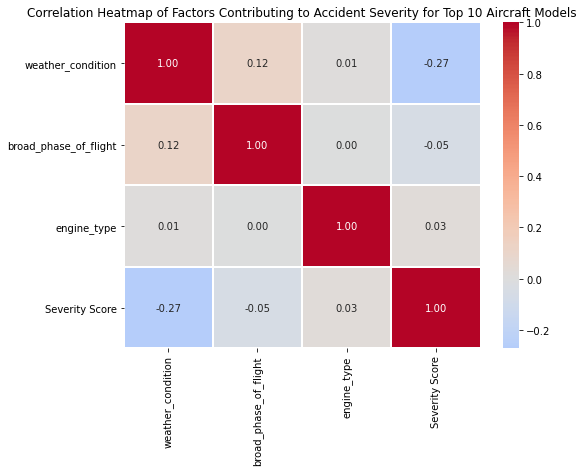

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)

# Set title and labels
plt.title('Correlation Heatmap of Factors Contributing to Accident Severity for Top 10 Aircraft Models')
plt.show()


### 4.3. Objective 3

The purpose of this objective is to use Geospatial Map to visualize accident distribution and risk hotspots the US.

By translating these findings into actionable insights, this project will assist the head of the aviation division in making informed, risk-conscious decisions when selecting aircraft for the company's new business endeavor.

The mapping was done using tableau and the link is provide below. 




a) Private aircraft, such as the Piper-PA-28-161 and Cessna 150, tend to have lower severity scores. However, this is still higher than for commercial aircraft. The overall risk of accidents is higher in private aviation due to lower pilot experience and fewer safety features. Therefore, the risk of investing in private plane is higher than in commercial planes

b)  Weather conditions are the dominant factor influencing accident severity, with a clear correlation to severe weather events causing higher-risk incidents.
The correction among Engine type, broad-phase of flight and weather condition is also very low. 

c)  Most accidents happen during landing, followed by cruise and then takeoff. Very few accidents happen when a plane is standing and when taxiing to the Runway

d) California has the highest severity scores, followed by Florida and Texas, suggesting these states have higher accident rates compared to others.
North and South Dakota have the lowest accident severity, indicating a lower risk for operations in these states.


# 5. Recommendations

a). Prioritize Commercial Aircraft Over Private Aircraft: Commercial aircraft generally exhibit a lower risk of accidents compared to private aircraft. Investing in commercial aircraft would align with the company’s goal of minimizing risk and enhancing safety for the new aviation venture.

b). Invest in Aircraft Resilient to Extreme Weather: Weather conditions are the leading cause of aviation accidents. The company should consider aircraft that are designed to withstand extreme weather, such as those equipped with better de-icing and weather detection systems.

c). Focus on Landing Infrastructure and Safety Protocols: The landing phase of flight is where most accidents occur. The company should invest in improving airport infrastructure and implement robust safety protocols for landing procedures. This will reduce the overall risk during this critical phase of flight.

d). Invest in North and south Dakota: These best place to start the company since very few accidents happen there


# 6. Next Steps
The following next steps should be taken to operationalize these findings:

a). Aircraft Review: The company should review various commercial aircraft models that meet safety and weather-resilience criteria.

b). Weather Resilience Investment: Identify and prioritize aircraft that have been proven to perform well in adverse weather conditions.

c). Landing Infrastructure: Conduct a feasibility study on improving landing infrastructure, focusing on critical accident hotspots, particularly in states like California and Florida.
